# 1.Genetic toogle Switch

## Question 1.1:
A true switch should exhibit history-dependent behaviour. Gardner and colleagues demonstrated such hysteresis by applying a series of inducers to their genetic construct. We will repeat this experiment with the model. Write some code to simulate the dynamics of u and v using odeint. You will need to create a function that returns du∕dt and dv∕dt given u and v and t. As we will vary the concentration of inducers, the function should also take the concentrations of the inducers as inputs. Let au=10, av=9, K=3, and both Hill numbers equal 2. [2] 

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#creates function 
def toggleswitch(y, t, Iu, Iv):
    au=10 ; av=9 ; k=3 ; b=2 ; n=2
    (u,v)=y
    dudt= -u+(au/(1+(v/(1+Iv/k)**n)**b))
    dvdt= -v+(av/(1+(u/(1+Iu/k)**n)**b))
    return np.array([dudt,dvdt])


## Question 1.2:
 Starting with u=v=0, simulate the application of Iu for 50 time units (set Iu=100 and Iv=0), then remove Iu for another 50 time units. Following this removal, apply Iv for 50 time units (set Iu=0 and Iv=100) and then remove Iv for another 50 time units. You will need to call odeint four times and use the final values of u and v from the last call to odeint as the inital values for the current call to odeint. Plot your results (remembering to use show() to view the figure). [4] Do you see hysteresis (history-dependent behaviour)? Why? Change both Hill numbers to 1. Rerun the experiment and explain what you observe. [3] 

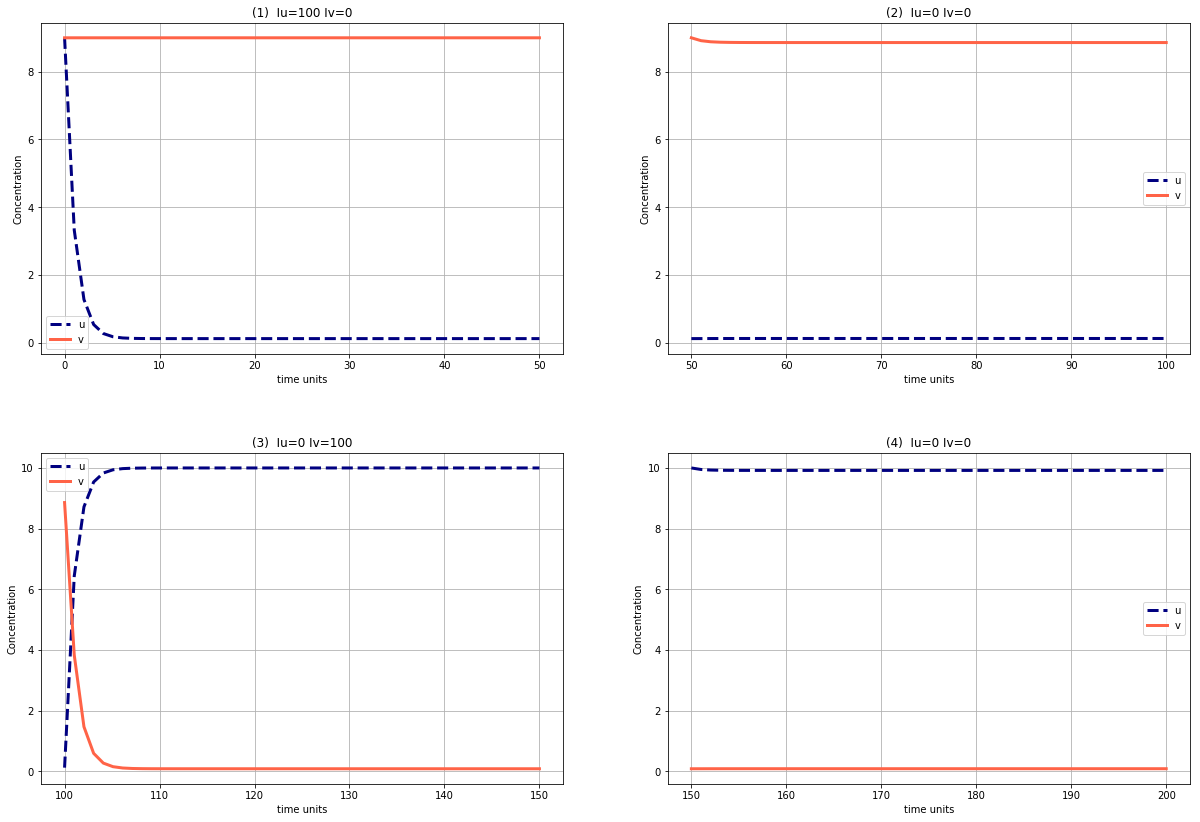

In [6]:
y0=[9,9]
t1=np.linspace(0,50)
t2=np.linspace(50,100)
t3=np.linspace(100,150)
t4=np.linspace(150,200)
plt.figure(figsize= (14, 14))
plt.subplots_adjust(left= 0.06, right=1.2, wspace=0.2, hspace=0.3) 
Iu=100
Iv=0
y1=odeint(toggleswitch,y0,t1,(Iu,Iv))
plt.subplot(2,2,1)
plt.plot(t1,y1[:,0],color='navy',label='u',linewidth=3,linestyle='--')
plt.plot(t1,y1[:,1],color='tomato',label='v',linewidth=3)
plt.legend()
plt.xlabel('time units')
plt.ylabel('Concentration')
plt.title('(1)  Iu=100 Iv=0')
plt.grid()
Iu=0
Iv=0
y2=odeint(toggleswitch,y1[-1],t2,(Iu,Iv))
plt.subplot(2,2,2)
plt.plot(t2,y2[:,0],color='navy',label='u',linewidth=3,linestyle='--')
plt.plot(t2,y2[:,1],color='tomato',label='v',linewidth=3)
plt.legend()
plt.xlabel('time units')
plt.ylabel('Concentration')
plt.title('(2)  Iu=0 Iv=0')
plt.grid()
Iu=0
Iv=100
y3=odeint(toggleswitch,y2[-1],t3,(Iu,Iv))
plt.subplot(2,2,3)
plt.plot(t3,y3[:,0],color='navy',label='u',linewidth=3,linestyle='--')
plt.plot(t3,y3[:,1],color='tomato',label='v',linewidth=3)
plt.legend()
plt.xlabel('time units')
plt.ylabel('Concentration')
plt.title('(3)  Iu=0 Iv=100')
plt.grid()
Iu=0
Iv=0
y4=odeint(toggleswitch,y3[-1],t4,(Iu,Iv))
plt.subplot(2,2,4)
plt.plot(t4,y4[:,0],color='navy',label='u',linewidth=3,linestyle='--')
plt.plot(t4,y4[:,1],color='tomato',label='v',linewidth=3)
plt.legend()

plt.xlabel('time units')
plt.ylabel('Concentration')
plt.title('(4)  Iu=0 Iv=0')
plt.grid()
plt.show()




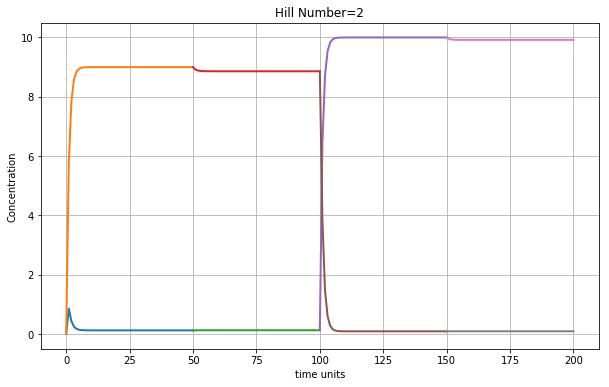

In [89]:
plt.figure(figsize= (10, 6))
plt.plot(t1,y1,linewidth=2)
plt.plot(t2,y2,linewidth=2)
plt.plot(t3,y3,linewidth=2)
plt.plot(t4,y4,linewidth=2)
plt.xlabel('time units')
plt.ylabel('Concentration')
plt.title('Hill Number=2')
plt.grid()
plt.show()

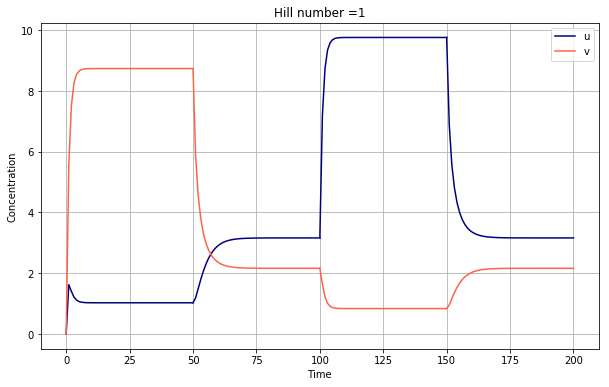

In [132]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def toggleswitch2(y, t, Iu, Iv):
    au=10 ; av=9 ; k=3 ; b=1 ; n=1
    (u,v)=y
    dudt= -u+(au/(1+(v/(1+Iv/k)**n)**b))
    dvdt= -v+(av/(1+(u/(1+Iu/k)**n)**b))
    return np.array([dudt,dvdt])

plt.figure(figsize= (10, 6))
y0=[0,0]
t1=np.linspace(0,50)
t2=np.linspace(50,100)
t3=np.linspace(100,150)
t4=np.linspace(150,200)
Iu=100
Iv=0
y1=odeint(toggleswitch2,y0,t1,(Iu,Iv))
plt.plot(t1,y1[:,0],color='navy',label='u')
plt.plot(t1,y1[:,1],color='tomato',label='v')
Iu=0
Iv=0
y2=odeint(toggleswitch2,y1[-1],t2,(Iu,Iv))
plt.plot(t2,y2[:,0],color='navy')
plt.plot(t2,y2[:,1],color='tomato')
Iu=0
Iv=100
y3=odeint(toggleswitch2,y2[-1],t3,(Iu,Iv))
plt.plot(t3,y3[:,0],color='navy')
plt.plot(t3,y3[:,1],color='tomato')
Iu=0
Iv=0
y4=odeint(toggleswitch2,y3[-1],t4,(Iu,Iv))
plt.plot(t4,y4[:,0],color='navy')
plt.plot(t4,y4[:,1],color='tomato')
plt.grid()
plt.legend()
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.title('Hill number =1')
plt.show()


## Question 1.3: 
Determine the nullclines of the model system. To investigate the stability of the fixed points, plot the nullclines on the same graph with u on the x-axis and v on the y-axis and for Iu=Iv=0. Picking 10 initial conditions for u and v, use odeint to determine their time evolution and plot the trajectories on the same graph as your nullclines. You can use the alpha option in plt.plot to increase the transparency of the plotted trajectory. Mark the start and the end points of each trajectory with a point. Explain which fixed points are stable and, from the trajectories you plotted, why. [5] 

In [47]:
def st_st(u):
    return -u+(au/(1+((av/(1+(u/(1+(Iu/K))**n)**b))/(1+(Iv/K))**n)**b))

/Users/DrJEBC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


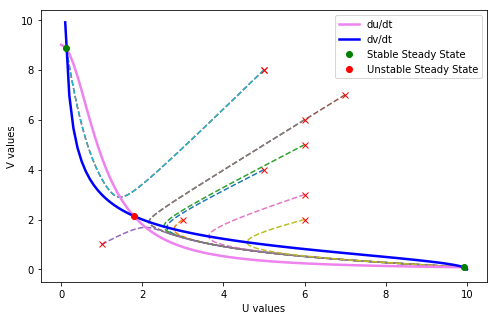

In [48]:
random_y0=[]
for i in range(10):
    alpha=np.random.randint(1,9,2)
    random_y0.append(alpha)

au=10
av=9
K=3
b=2
n=2
Iu=0
Iv=0
npts=100
vmin,vmax=0,10
umin,umax=0,10
v=np.linspace(vmin,vmax,npts)
u=np.linspace(umin,umax,npts)
time2=np.linspace(0,100,1000)
plt.figure(figsize= (8, 5))
for i in random_y0:
    yi=odeint(toggleswitch,i,time2,(0,0))
    plt.plot(yi[:,0],yi[:,1],linestyle='--')
    plt.plot(i[0],i[1],'rx')
plt.plot(u,(av/(1+(u/(1+(Iu/K))**n)**b)),linewidth=2.5,color='violet',label='du/dt')
plt.plot(u,((1+(Iv/K))**n)*((au/u)-1)**(1/b),linewidth=2.5,color='blue',label='dv/dt')
sol1=fsolve(st_st, K/100)
sol2=fsolve(st_st, K)
sol3=fsolve(st_st, 23*K)
plt.plot(sol1 , (av/(1+(sol1/(1+Iu/K)**n)**b)), 'go',label='Stable Steady State')
plt.plot(sol2, (av/(1+(sol2/(1+Iu/K)**n)**b)), 'ro',label='Unstable Steady State')
plt.plot(sol3, (av/(1+(sol3/(1+Iu/K)**n)**b)), 'go')
plt.legend(loc='upper right')
plt.ylabel('V values')
plt.xlabel('U values')
plt.show()

## Question 1.4:
Determining the bifurcation diagram for a bistable system is another way to demonstrate that the system exhibits hysteresis. Assume that the gene coding u is positively controlled by another transcription factor. Increasing the concentration of this transcription factor will increase the parameter au in the equation for du∕dt. We will assume that the concentration of transcription factor changes only slowly and that the system reaches steady-state before the concentration of transcription factor changes again. Write code to increase au from 0 to 35, and calculate the steady-state value of u for each value of au using the steady-state values of u and v for the previous value of au as the initial conditions for the current value of au. Now decrease au from 35 to 0 using, as before, the steady-state values for the previous au as the initial values for the new value of au. You can use the np.linspace command to set the values of au. Plot on the same graph the steady-state value of u against au when au is increased and when au is decreased. Explain what you see. Is there a range of values for au for which the switch once thrown on cannot be reset? [6]

In [49]:
au_values=np.linspace(0,35,36)
meh_values=np.linspace(34,0,35)

In [50]:
def toggleswitch3(y, t, Iu, Iv, au):
    av=9 ; k=3 ; b=2 ; n=2
    (u,v)=y
    dudt= -u+(au/(1+(v/(1+Iv/k)**n)**b))
    dvdt= -v+(av/(1+(u/(1+Iu/k)**n)**b))
    return np.array([dudt,dvdt])

In [80]:

def bifurcation(au1,au2):
    steady_state_graph1=[]
    steady_state_graph2=[]
    y0=[0,0]
    for i in au1:
        y=odeint(toggleswitch3,y0,t1,(Iu,Iv,i))
        steady_state_graph1.append(y[-1,0])
        y0=y[-1]
    for j in au2:
        c=odeint(toggleswitch3,y0,t1,(Iu,Iv,j))
        steady_state_graph2.append(c[-1,0])
        y0=c[-1]
    plt.figure(figsize= (8, 8))
    plt.scatter(au1,steady_state_graph1,alpha=0.4,color='blue',label='Ascending values of au')
    plt.scatter(au2,steady_state_graph2,alpha=0.4,color='red',label='Descending values of au')
    plt.legend()
    plt.ylabel('U values at steady state')
    plt.xlabel('Au values')
    plt.show()

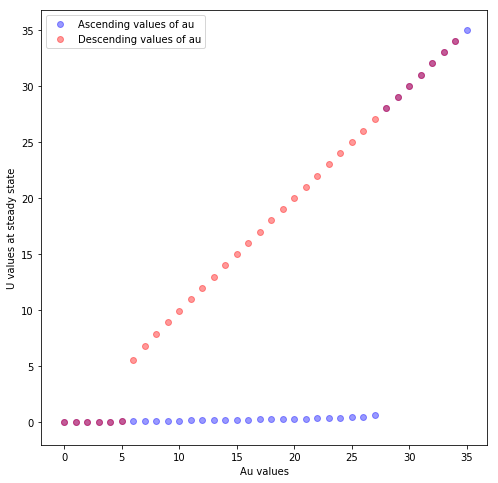

In [81]:
bifurcation(au_values,meh_values)

# 2. Repressilator

## Question 2.1


Answer to question 2.1

## Question 2.2
Fix b=10 and by varying a, starting around the value of 14, produce six plots of the concentration of one of the proteins as the system goes through a bifurcation from a steady-state to a limit cycle. Use odeint to perform the simulations and plt.subplot to draw all six plots in the same figure window. You will need to create a function that returns dmi∕dt and dpi∕dt for all three genes (i=1, 2 and 3). Make sure that at least one of the repressors has a positive initial value. If there are no repressors and no mRNAs, the system stays at this unstable steady-state. Label each subplot with its corresponding value of a. [4]

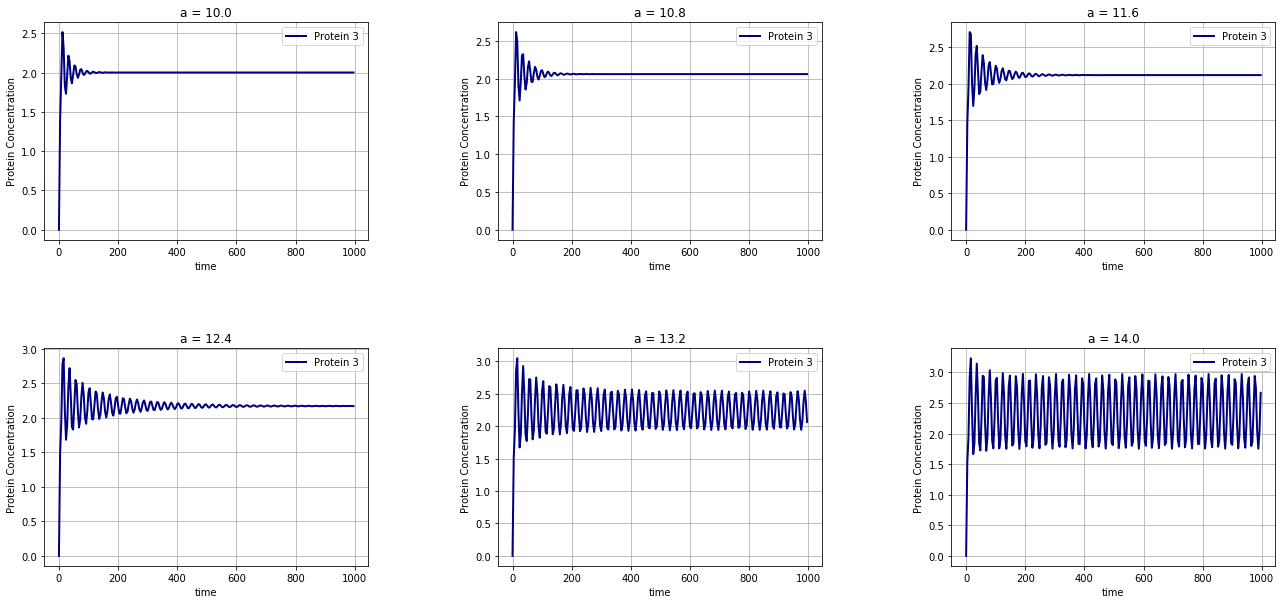

In [25]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def f(y, t, a, n, b): 
    return (-y[0]+a/(1+y[5]**n),
            -y[1]+a/(1+y[3]**n),
            -y[2]+a/(1+y[4]**n),
            b*(y[0]-y[3]),
            b*(y[1]-y[4]),
            b*(y[2]-y[5]))
          
a= np.linspace(10,14,6) 
t= np.arange(0,1000,4) 
ini= (1,0,0,0,0,0) 
sp=1 

plt.figure(figsize= (15, 10))
for i in a:
    rep= odeint(f, ini, t, args=(i,2,10)) 
    plt.subplot(2,3,sp)
    sp = sp+1
    plt.plot(t,rep[:,5],linewidth=2,color='navy') 
    plt.title('a = %s' %(i))
    plt.ylabel('Protein Concentration')
    plt.xlabel('time')
    plt.legend(['Protein 3'])
    plt.subplots_adjust(left= 0.06, right=1.2, wspace=0.4, hspace=0.5) 
    plt.grid()

## Question 2.3

In [147]:
a=np.logspace(0,3,100)
b=np.logspace(-1,3,100)
t = np.arange(0,100,1)

/Users/DrJEBC/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


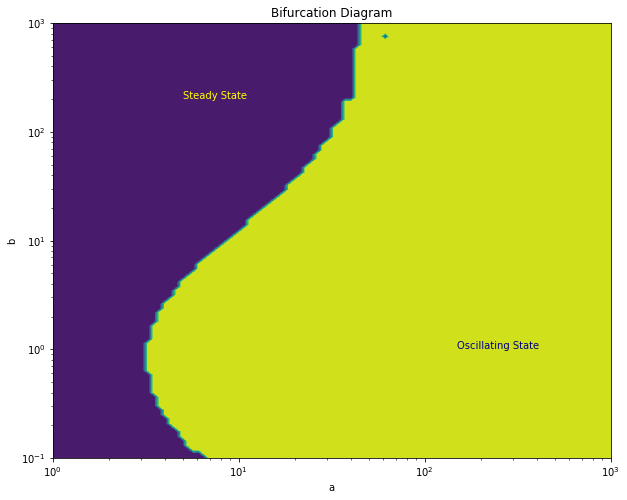

In [149]:
swain=[]
for i in b:
    for j in a:
        results=odeint(f,ini,t,(j,2,i))
        if np.sum(np.absolute(np.diff(results[-20:,5]))) <= 0.05:
            swain.append(0)
        else:
            swain.append(1)
swain_array=np.asarray(swain)
swain_grid=swain_array.reshape(100,100)
plt.figure(figsize= (8, 6))

plt.contourf(a,b,swain_grid)
plt.xscale('log')
plt.yscale('log')
plt.text(5,200,'Steady State',color='yellow')
plt.text(150,1,'Oscillating State',color='navy')
plt.ylabel('b')
plt.xlabel('a')
plt.title('Bifurcation Diagram')
plt.show()